# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set_style('darkgrid')

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
income = pd.read_csv('Median_Household_Income_2015.csv', encoding = "windows-1252")
poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding = "windows-1252")
hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding = "windows-1252")
race = pd.read_csv('Share_of_Race_By_City.csv', encoding = "windows-1252")
deaths = pd.read_csv('Deaths_by_Police_US.csv', encoding = "windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
income.shape, poverty.shape, hs.shape, race.shape, deaths.shape

((29322, 3), (29329, 3), (29329, 3), (29268, 7), (2535, 14))

In [6]:
income.columns, poverty.columns, hs.columns, race.columns, deaths.columns

(Index(['Geographic Area', 'City', 'Median Income'], dtype='object'),
 Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object'),
 Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object'),
 Index(['Geographic area', 'City', 'share_white', 'share_black',
        'share_native_american', 'share_asian', 'share_hispanic'],
       dtype='object'),
 Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
        'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
        'flee', 'body_camera'],
       dtype='object'))

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [7]:
income.isna().values.any(), poverty.isna().values.any(), hs.isna().values.any(), race.isna().values.any(), deaths.isna().values.any(),

(True, False, False, False, True)

In [8]:
income.fillna('-', inplace = True), deaths.fillna('-', inplace = True)

(None, None)

In [9]:
income.duplicated().values.any(), poverty.duplicated().values.any(), hs.duplicated().values.any(), race.duplicated().values.any(), deaths.duplicated().values.any(),

(False, False, False, False, False)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
def fun(x):
    try:
        return float(x)
    except:
        pass

In [11]:
poverty['poverty_rate'] = poverty['poverty_rate'].apply(fun)

<Axes: xlabel='Geographic Area', ylabel='poverty_rate'>

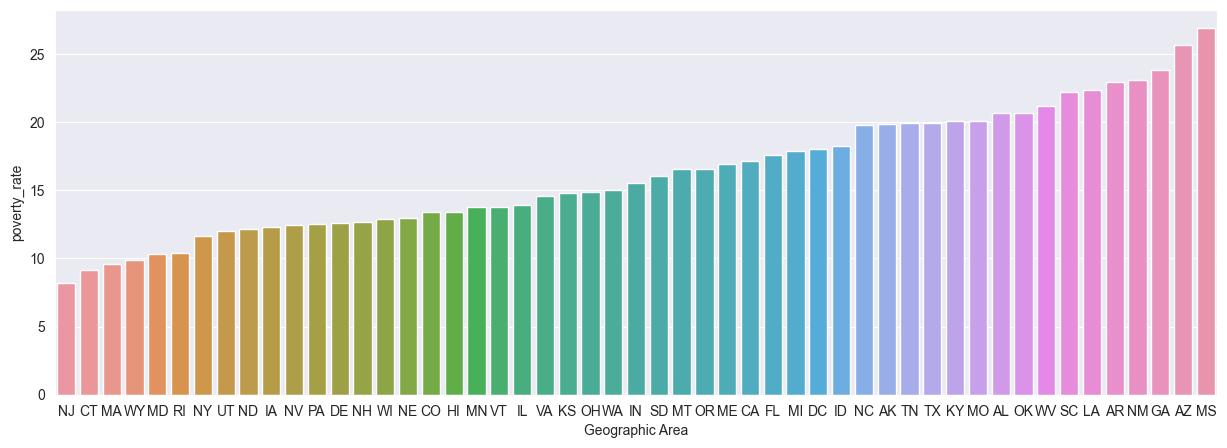

In [12]:
plt.figure(figsize = (15, 5))
sns.barplot(poverty.groupby('Geographic Area').mean(numeric_only = True).reset_index().sort_values('poverty_rate'),
            x = 'Geographic Area', y = 'poverty_rate')

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [13]:
hs['percent_completed_hs'] = hs['percent_completed_hs'].apply(fun)

<Axes: xlabel='Geographic Area', ylabel='percent_completed_hs'>

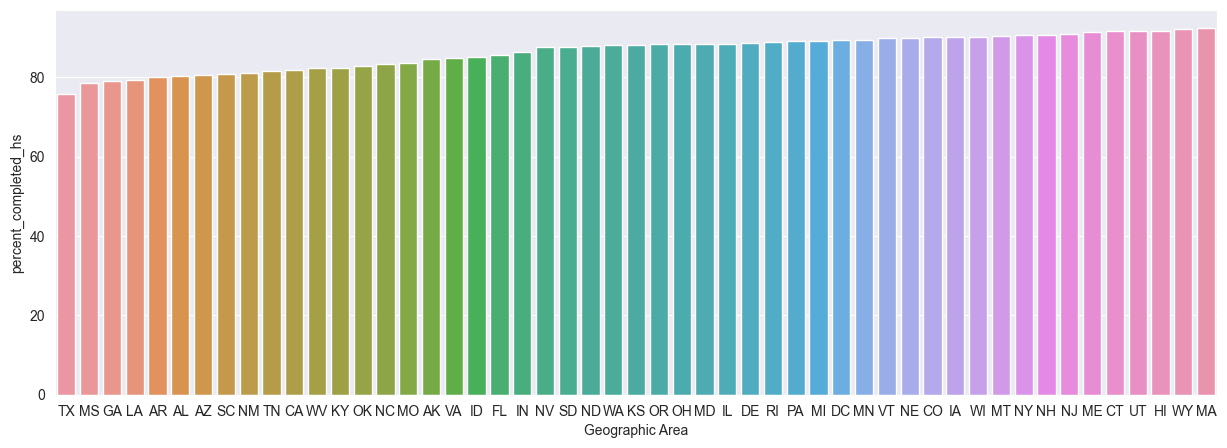

In [14]:
plt.figure(figsize = (15, 5))
sns.barplot(hs.groupby('Geographic Area', as_index = False).mean(numeric_only = True).sort_values('percent_completed_hs'), x = 'Geographic Area', y = 'percent_completed_hs')

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

<Axes: xlabel='Geographic Area', ylabel='Completed Highschool Percent'>

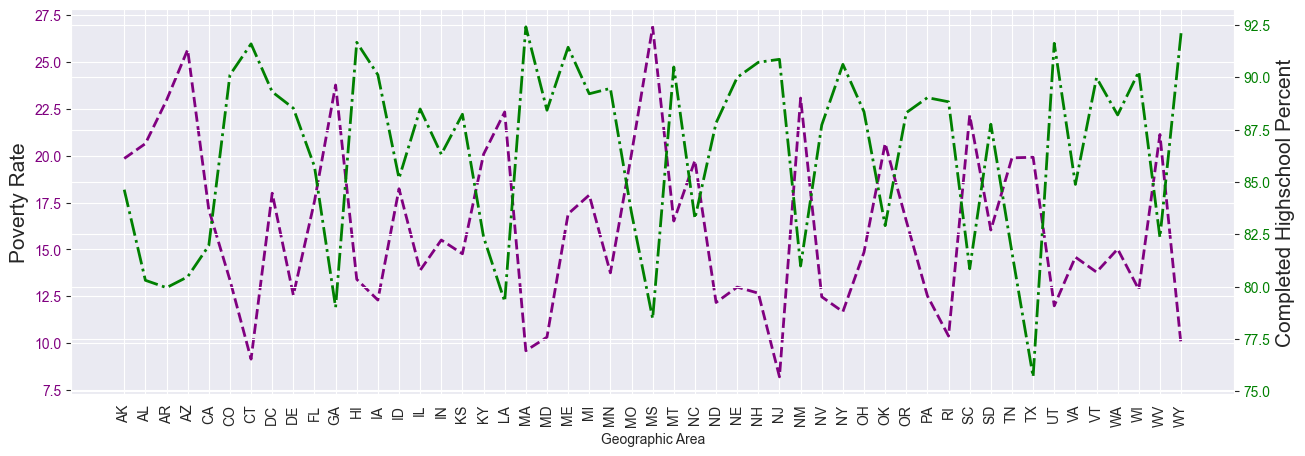

In [15]:
plt.figure(figsize = (15, 5))
plt.ylabel('Poverty Rate', fontsize = 15)
plt.yticks(color = 'purple')
plt.xticks(rotation = 90)
sns.lineplot(poverty.groupby('Geographic Area', as_index = False).mean(numeric_only = True),
x = 'Geographic Area', y = 'poverty_rate', color = 'purple', lw = 2, ls = '--')
ax = plt.gca().twinx()
ax.set_ylabel('Completed Highschool Percent', fontsize = 15)
plt.yticks(color = 'green')
sns.lineplot(hs.groupby('Geographic Area', as_index = False).mean(numeric_only = True),
x = 'Geographic Area', y = 'percent_completed_hs', ax = ax, color = 'green', lw = 2, ls = '-.')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Axes: xlabel='Geographic Area', ylabel='Completed Highschool Percent'>

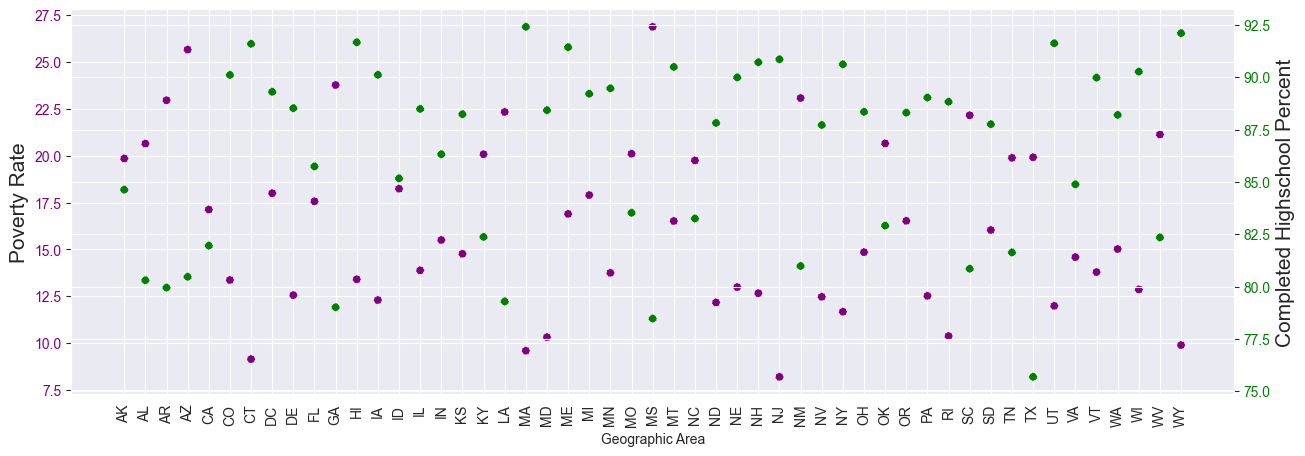

In [16]:
plt.figure(figsize = (15, 5))
plt.ylabel('Poverty Rate', fontsize = 15)
plt.yticks(color = 'purple')
plt.xticks(rotation = 90)
sns.scatterplot(poverty.groupby('Geographic Area', as_index = False).mean(numeric_only = True),
x = 'Geographic Area', y = 'poverty_rate', color = 'purple', lw = 2, ls = '--')
ax = plt.gca().twinx()
ax.set_ylabel('Completed Highschool Percent', fontsize = 15)
plt.yticks(color = 'green')
sns.scatterplot(hs.groupby('Geographic Area', as_index = False).mean(numeric_only = True),
x = 'Geographic Area', y = 'percent_completed_hs', ax = ax, color = 'green', lw = 2, ls = '-.')

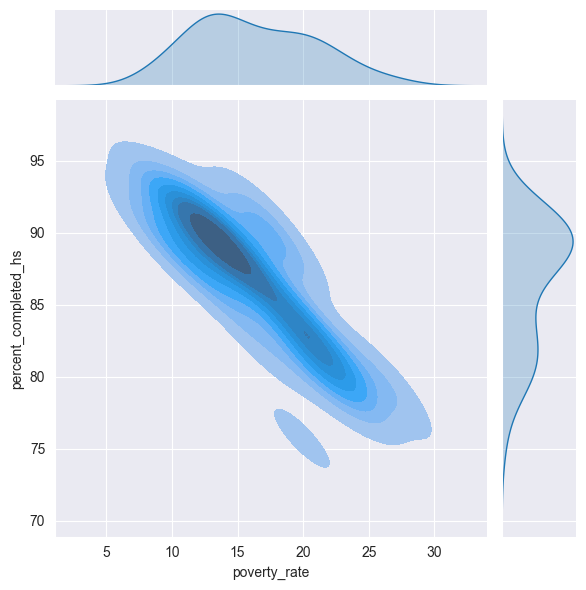

In [17]:
sns.jointplot(x = poverty.groupby('Geographic Area').mean(numeric_only = True)['poverty_rate'], fill = True,
y = hs.groupby('Geographic Area').mean(numeric_only = True)['percent_completed_hs'], kind = 'kde')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Axes: xlabel='poverty_rate', ylabel='percent_completed_hs'>

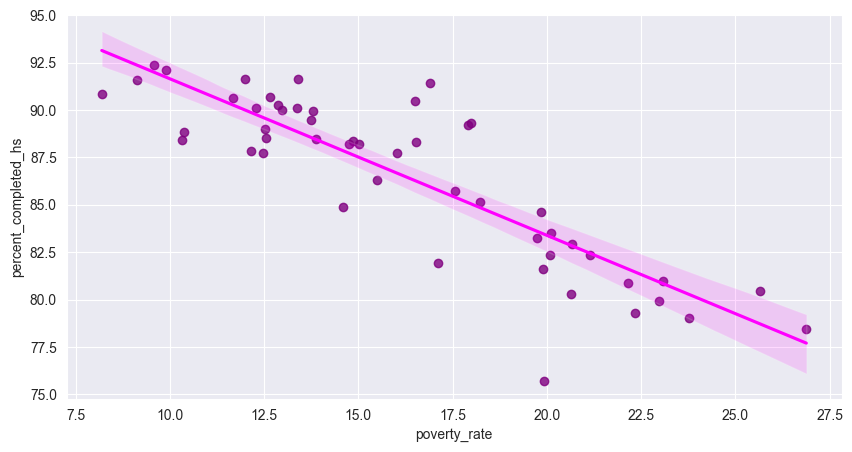

In [18]:
plt.figure(figsize = (10, 5))
sns.regplot(x = poverty.groupby('Geographic Area', as_index = False).mean(numeric_only = True)['poverty_rate'],
y = hs.groupby('Geographic Area', as_index = False).mean(numeric_only = True)['percent_completed_hs'],
line_kws = dict(color = 'fuchsia'), scatter_kws = dict(color = 'purple'))

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [19]:
race['share_asian'] = race['share_asian'].apply(fun)
race['share_black'] = race['share_black'].apply(fun)
race['share_hispanic'] = race['share_hispanic'].apply(fun)
race['share_native_american'] = race['share_native_american'].apply(fun)
race['share_white'] = race['share_white'].apply(fun)

In [20]:
px.bar(race.groupby('Geographic area').mean(numeric_only = True))

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [21]:
px.pie(values = deaths['race'].value_counts(), hole = 0.6, names = deaths['race'].value_counts().index,).update_traces(textfont_size = 15, textposition = 'outside', textinfo = 'label+percent')

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [22]:
deaths.value_counts('gender')

gender
M    2428
F     107
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

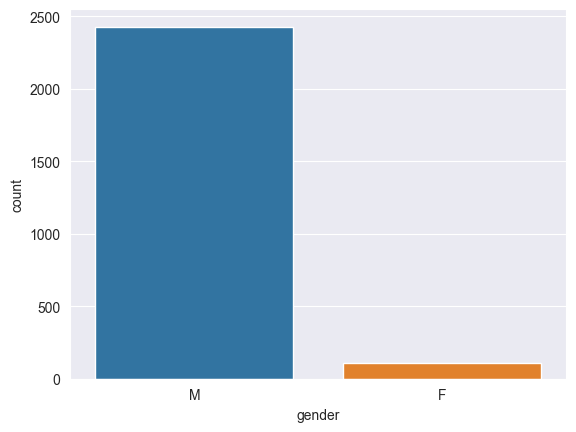

In [23]:
sns.barplot(deaths.value_counts('gender').reset_index(), x = 'gender', y = 'count')

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [45]:
a = deaths.groupby('gender', as_index = False)['manner_of_death'].value_counts()
px.box(a, x = 'manner_of_death', y = 'count', color = 'gender')

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [105]:
a = deaths.loc[lambda x: x['armed'] == 'unarmed'].index.size / deaths.loc[lambda x: x['armed'] == 'gun'].index.size
print(f'Unarmed / Armed with a gun = {round(a * 100, 2)}%')

Unarmed / Armed with a gun = 12.23%


<Axes: xlabel='armed', ylabel='count'>

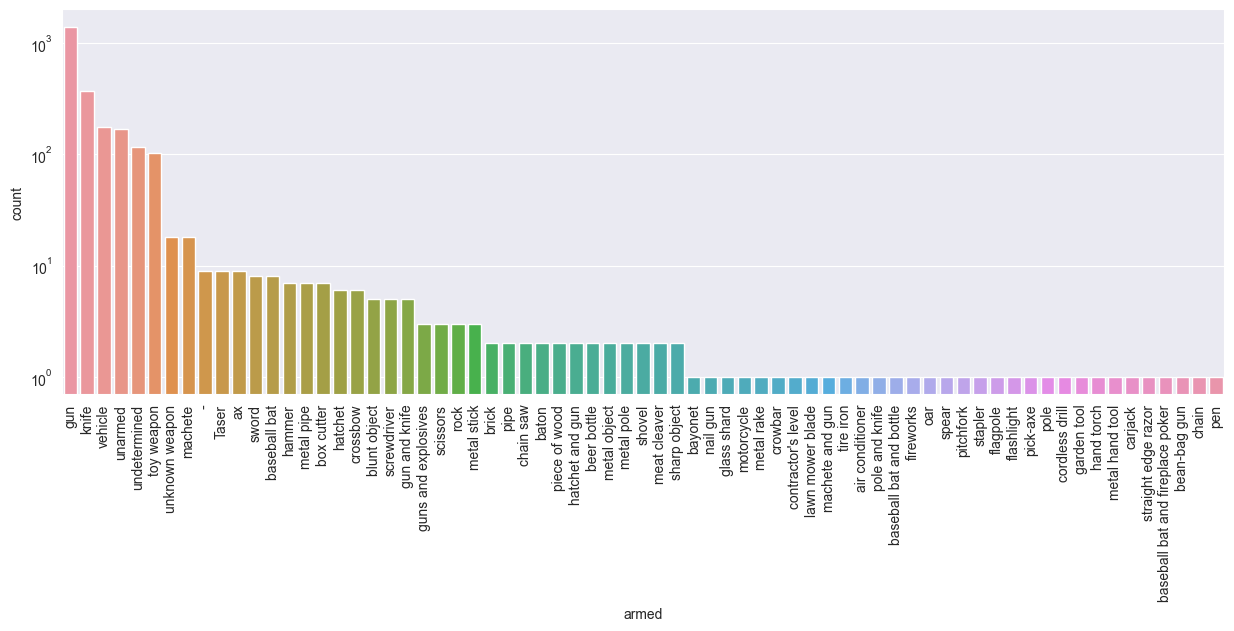

In [65]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
plt.yscale('log')
sns.barplot(deaths['armed'].value_counts().reset_index(), x = 'armed', y = 'count')

In [84]:
a = deaths.loc[lambda x: (x['armed'] == 'gun') | (x['armed'] == 'unarmed')]['armed'].value_counts().reset_index()
px.bar(a, 'armed', y = 'count', color = 'armed')

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [125]:
a = round(deaths['age'].loc[lambda x: x < 25].count() / deaths['age'].loc[lambda x: x >= 25].count() * 100, 2)
print(f'{a}%')

22.41%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

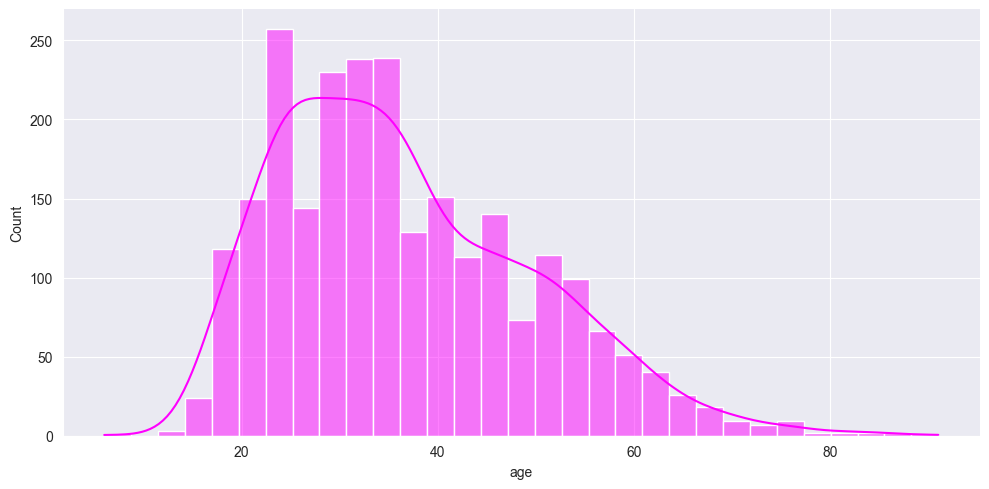

In [135]:
sns.displot(deaths['age'], kde = True, aspect = 2, color = 'fuchsia')

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<Axes: xlabel='count', ylabel='Density'>

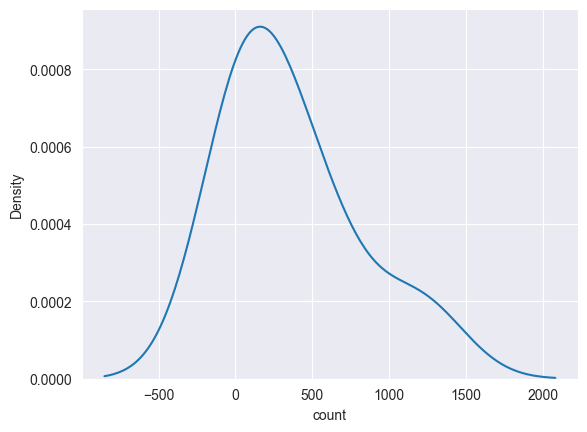

In [182]:
sns.kdeplot(deaths['race'].value_counts())

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [187]:
px.histogram(deaths['race'], color = deaths['race'])

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [194]:
print(f"{round(deaths['signs_of_mental_illness'].loc[lambda x: x == True].count() / deaths['signs_of_mental_illness'].loc[lambda x: x == False].count() * 100, 2)}%")

33.28%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [200]:
px.bar(deaths['city'].value_counts().head(10).reset_index(), 'city', 'count', color = 'city')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [212]:
race.rename(columns = {'City': 'city'}, inplace = True)

This is literally the greatest line of code i've ever written

In [357]:
a = deaths.loc[lambda x: x['city'].isin(deaths['city'].value_counts().head(10).index)].value_counts().reset_index()
px.bar(a, 'city', 'count', 'race')

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [370]:
px.choropleth(deaths['state'].value_counts().reset_index(), locations = 'state', scope = 'usa', color_continuous_scale = 'matter', color = 'count', locationmode = 'USA-states', title = 'Deaths By States')

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [376]:
deaths['date'] = pd.to_datetime(deaths['date'], format = '%d/%m/%y')

In [417]:
deaths['m-y'] = pd.to_datetime(deaths['date'].apply(lambda x: str(x.month) + '-' + str(x.year))).dt.date

C:\Users\townsend\AppData\Local\Temp\ipykernel_8608\1954630518.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<Axes: xlabel='count', ylabel='m-y'>

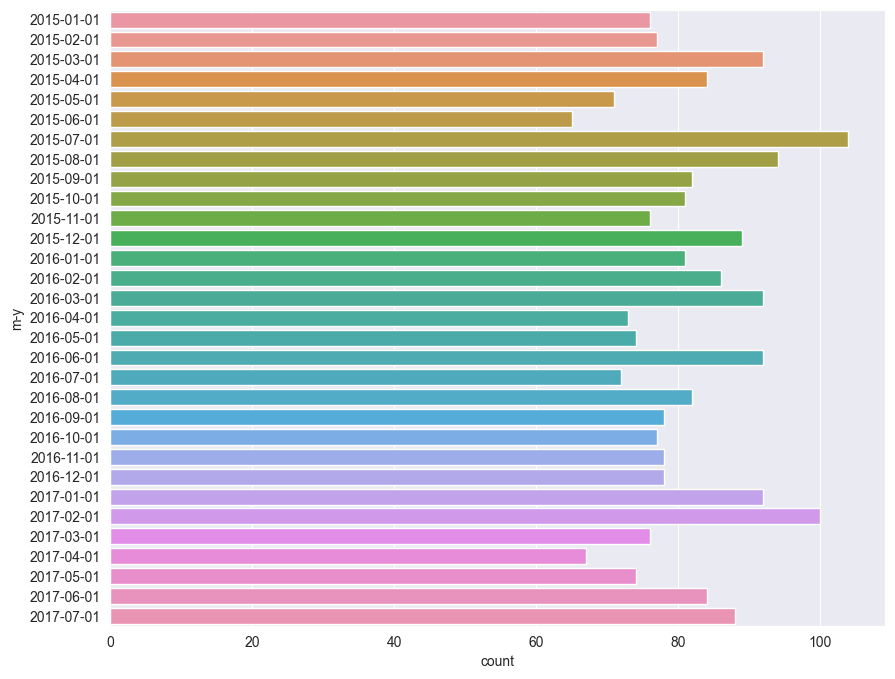

In [420]:
plt.figure(figsize = (10, 8))
sns.barplot(deaths['m-y'].value_counts().sort_index().reset_index(), y = 'm-y', x = 'count')

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).